<a href="https://colab.research.google.com/github/deven96/fashion_mnist/blob/master/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [5]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


# Visualizing the data

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


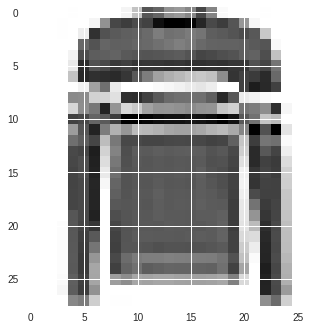

In [6]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

# Data Normalization

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [8]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [9]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


# Model Architecture

A Convolutional neural network


In [10]:
     

model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 

model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10, activation='softmax'))


# Take a look at the model summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
__________

# Compile the model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Train the model

Using the .fit() API

In [12]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
54720/55000 [============================>.] - ETA: 0s - loss: 0.6065 - acc: 0.7763
Epoch 00001: val_loss improved from inf to 0.39001, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 14s 258us/step - loss: 0.6053 - acc: 0.7766 - val_loss: 0.3900 - val_acc: 0.8606
Epoch 2/10
54848/55000 [============================>.] - ETA: 0s - loss: 0.4225 - acc: 0.8472
Epoch 00002: val_loss improved from 0.39001 to 0.32151, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 10s 180us/step - loss: 0.4224 - acc: 0.8472 - val_loss: 0.3215 - val_acc: 0.8848
Epoch 3/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.3767 - acc: 0.8630
Epoch 00003: val_loss improved from 0.32151 to 0.30316, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 10s 180us/step - loss: 0.3768 - acc: 0.8630 - val_loss: 0.3032 - val_acc: 0.891

# Save trained model

In [19]:
#save model architecture
model.save('fashion_mnist_trained.h5')
model_file = drive.CreateFile({'title' : 'fashion_mnist_trained.h5'})
model_file.SetContentFile('fashion_mnist_trained.h5')
model_file.Upload()

# download to google drive
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '11VZ4ZCL648WbbBmVdNRGdf80HZ4UWtTV'})

In [21]:
#save model weights
model.save_weights('fashion_mnist_weights.h5')
weights_file = drive.CreateFile({'title' : 'fashion_mnist_weights.h5'})
weights_file.SetContentFile('fashion_mnist_weights.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '11I-TOIO0nuOnvl59OvDtaOHX6jj6A2zb'})